# **Import Libraries and modules**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


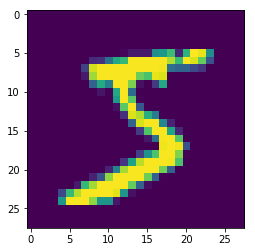

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from keras.callbacks import ModelCheckpoint
model = Sequential()


 
model.add(Conv2D(10, 3, 3, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(12, 3, 3)) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, 3, 3)) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Conv2D(10, 1, 1)) # 11
model.add(Activation('relu'))


model.add(Conv2D(12, 3, 3)) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, 3, 3)) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(10, 1))
model.add(Activation('relu'))#7
model.add(Conv2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1092      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
__________

In [0]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.002),
             metrics=['accuracy'])

## CheckPoint Model

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
model_path="/content/gdrive/My Drive/Colab Notebooks/EVA/Session5"
model_file = model_path + '/Assignment5.hd5'
checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.319 * epoch), 10)

#model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

##Image Normalization + ReLU After BN + L2 Regularization**

In [25]:

from keras.callbacks import LearningRateScheduler

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)


train_datagen = datagen.flow(X_train, Y_train, batch_size=64)
test_datagen = datagen.flow(X_test, Y_test)


# Creating instance of CheckPoint
# checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# fits the model on batches with real-time data augmentation:
model.fit_generator(train_datagen, steps_per_epoch=len(X_train)/64, validation_data=test_datagen, validation_steps=1, epochs=40, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
  7/937 [..............................] - ETA: 21s - loss: 0.0953 - acc: 0.9799

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


938/937 [==============================] - 20s 21ms/step - loss: 0.0493 - acc: 0.9847 - val_loss: 0.0715 - val_acc: 0.9688

Epoch 00001: val_acc improved from -inf to 0.96875, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Session5/Assignment5.hd5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0015163002.
938/937 [==============================] - 20s 21ms/step - loss: 0.0403 - acc: 0.9875 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 00002: val_acc improved from 0.96875 to 1.00000, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Session5/Assignment5.hd5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0012210012.
938/937 [==============================] - 20s 21ms/step - loss: 0.0343 - acc: 0.9890 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010219724.
938/937 [==============================] 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [27]:
print(score)

[0.019705466923412313, 0.9934]


In [0]:
y_pred = model.predict(X_test)

In [29]:
print(y_pred[:9])
print(y_test[:9])

[[3.59785530e-12 1.45898849e-10 2.18111538e-08 1.14740226e-08
  1.46653252e-14 8.63792024e-12 2.96921237e-19 1.00000000e+00
  2.82684761e-14 7.06249503e-10]
 [7.39993737e-08 1.01339026e-07 9.99999285e-01 2.04142525e-09
  4.21562896e-10 5.46806795e-13 1.62332512e-07 2.22700278e-11
  4.88555202e-07 1.31490251e-12]
 [1.61297944e-08 9.99996781e-01 2.46153064e-07 1.28261943e-10
  4.30164931e-07 4.36812186e-08 7.04260799e-07 1.77950869e-06
  2.63488111e-08 2.17134466e-09]
 [9.99999762e-01 1.97035600e-16 1.76324552e-10 6.42893334e-12
  1.13901406e-11 6.72164491e-10 1.31684530e-07 9.94515559e-13
  2.69106160e-09 6.24266434e-08]
 [1.18275669e-13 3.60881811e-12 1.34594783e-11 5.54946747e-14
  9.99992609e-01 1.06664304e-11 1.13122962e-10 1.39633010e-11
  1.73424105e-11 7.40038195e-06]
 [6.89600270e-08 9.99982476e-01 2.72288673e-07 6.08120082e-11
  8.19758611e-07 6.36466835e-09 5.81234616e-08 1.62405213e-05
  3.51921230e-08 1.91037977e-08]
 [1.02587269e-19 1.29432798e-09 8.44807488e-11 4.54868128e

## 25 Misclassified Images

[ 247  321  445  449  625  646  659  674  726  740  883  947 1014 1039
 1232 1247 1260 1393 1790 1901 1903 1982 2018 2035 2098 2118 2129 2130
 2329 2447 2462 2597 2654 2896 2939 3023 3030 3225 3384 3422 3520 3727
 4078 4176 4382 4477 4497 4504 4571 4639 4740 4807 4860 5937 6173 6555
 6571 6576 6597 6625 6651 8061 8408 8527 9664 9679 9698 9729 9792]
Found 69 incorrect labels


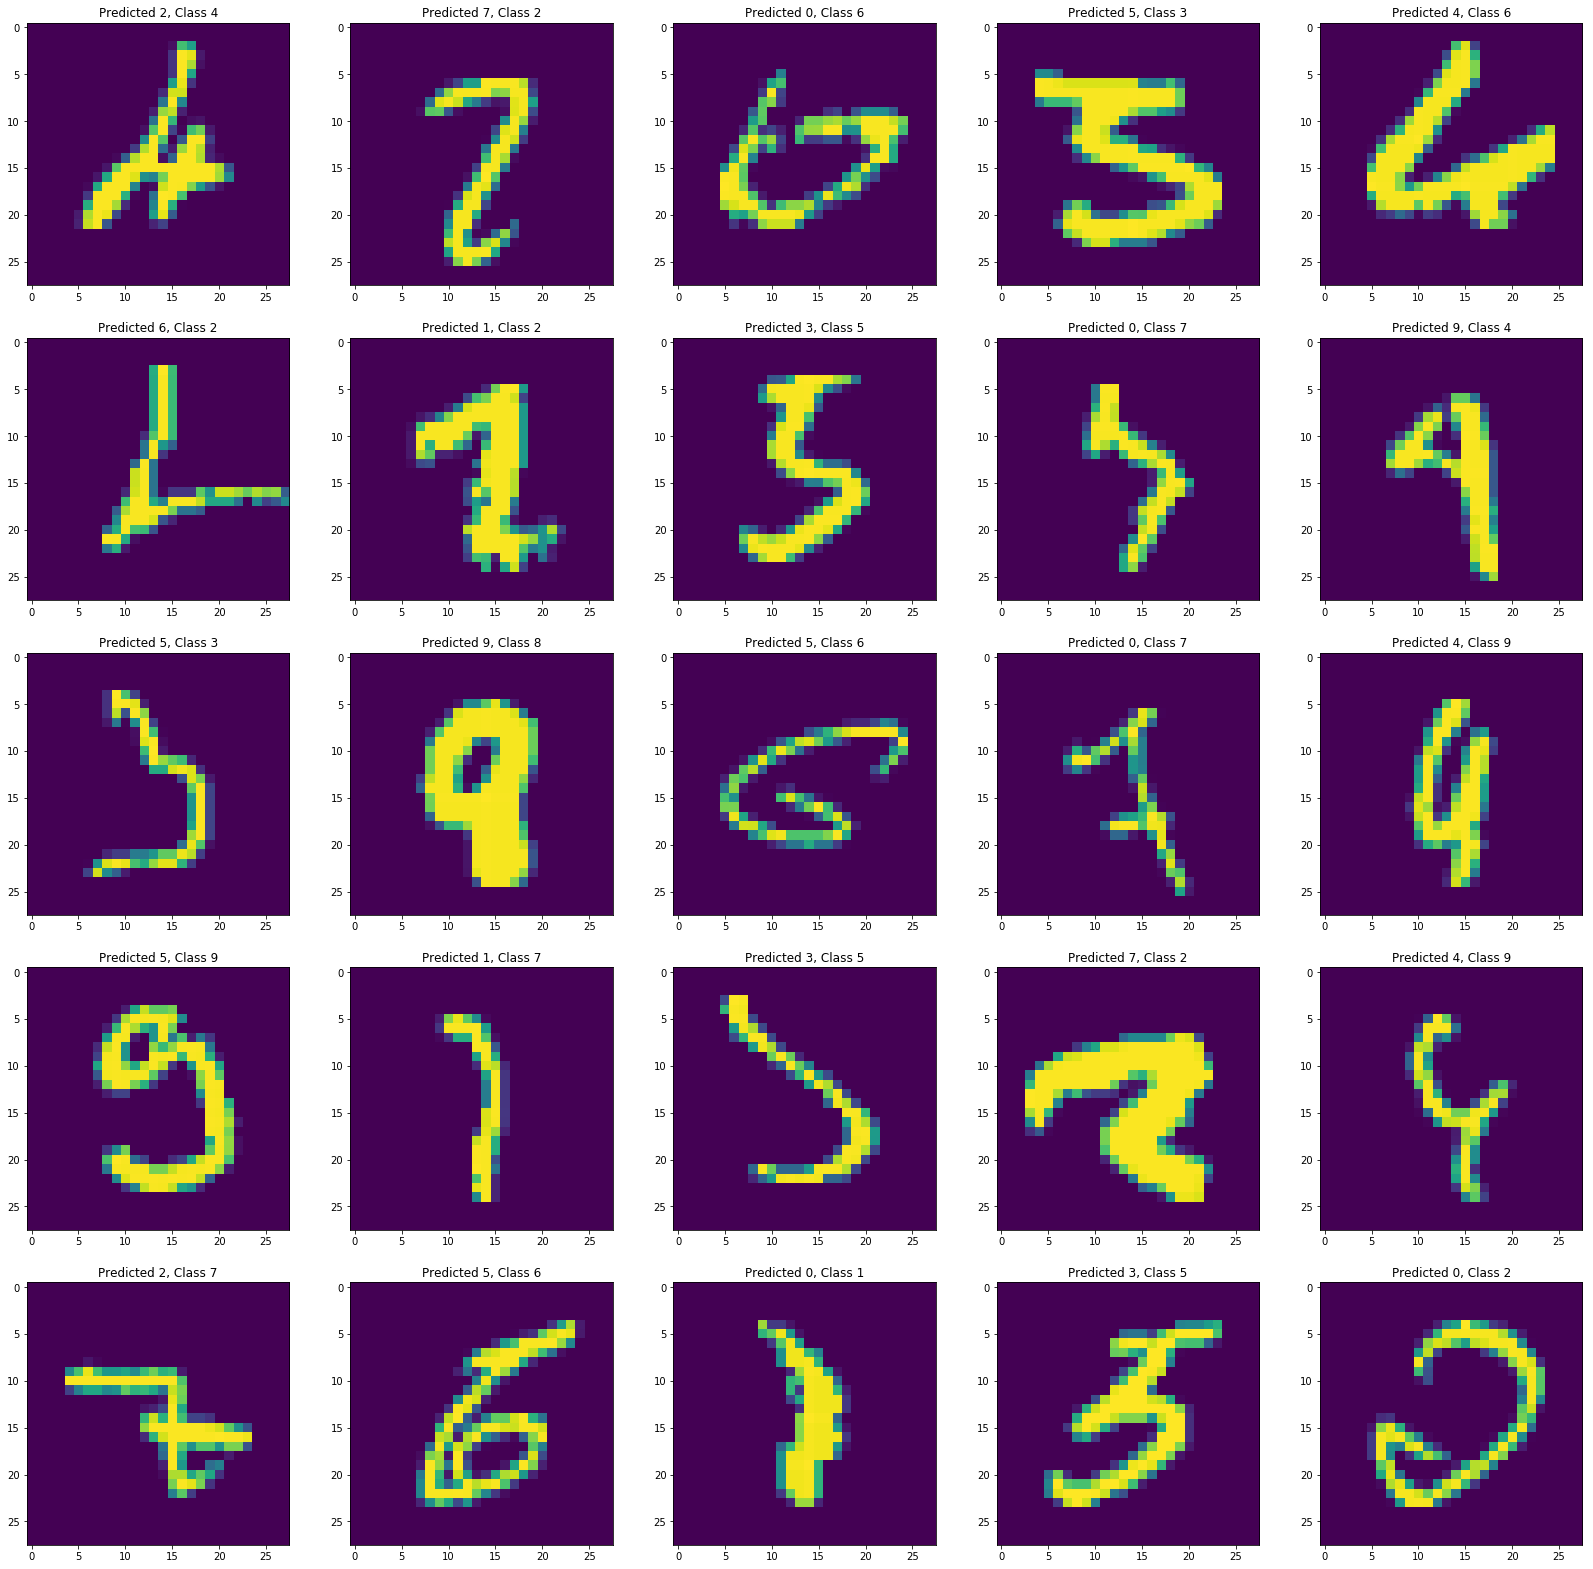

In [30]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)


import numpy as np

incorrect = np.where(y_pred!=y_test)[0]

print(incorrect)
print("Found %s incorrect labels" % (len(incorrect)))

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, 26):
  img_num = incorrect[i-1]
  img = X_test[img_num].reshape(28,28)
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.title("Predicted {}, Class {}".format(y_pred[img_num], y_test[img_num]))
plt.show()

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

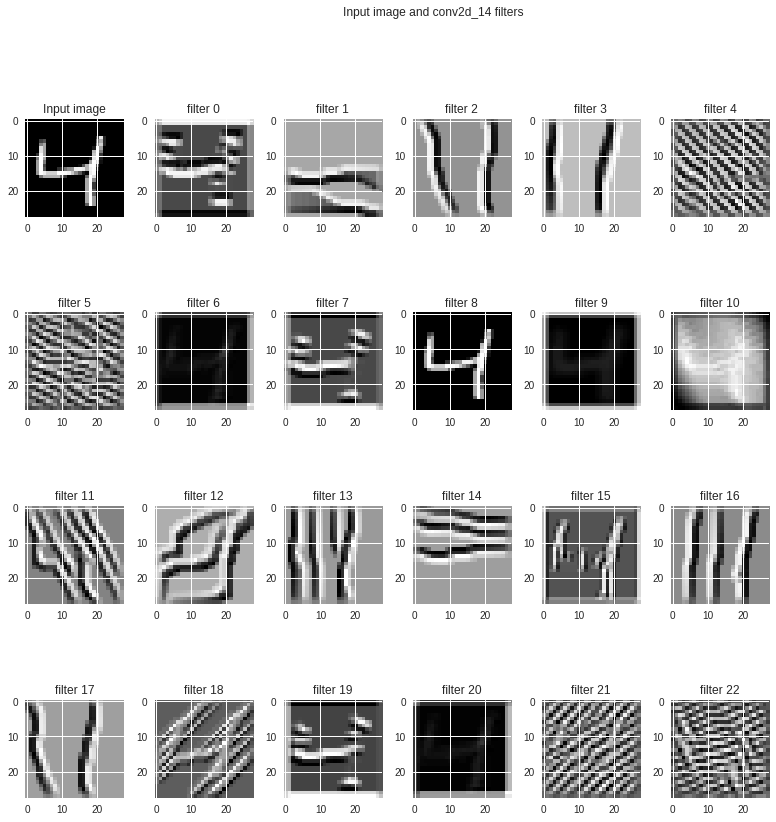

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()